<h1><center>LENDING CLUB CASE STUDY</center></h1>

<h2>ABSTRACT:</h2><h3>To understand how data could be used to minimize the risk of losing money while lending to customers for a Consumer Finance Company by applying <font color='red'><i>Exploratory Data Analysis </i></font>techniques.<br><br>The aim is to identify patterns through Univariate/ Bivariate/ Segmented Univariate analysis to establish the driving factors that are indicate the borrower's loan defaulting tendency, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.</h3>

<br><h2>ANALYSIS:</h2>
### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Reading the data

In [4]:
loan_df = pd.read_csv('loan.csv', low_memory = False)
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Starting pre processing the data

#### Null value check

In [5]:
# Define a function to calculate number and % of missing values by column

def missing_values_table(df):
        # Total missing values
        miss_val = df.isnull().sum()
        
        # Percentage of missing values
        miss_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)
        
        # Rename the columns
        miss_val_table_ren_columns = miss_val_table.rename(
        columns = {0 : 'Missing Values', 1 : 'per_tot_val'})
        
        # Sort the table by percentage of missing descending
        miss_val_table_ren_columns = miss_val_table_ren_columns[
            miss_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'per_tot_val', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(miss_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return miss_val_table_ren_columns

In [6]:
# Missing values statistics
missing_values = missing_values_table(loan_df)
missing_values['colnmes']=missing_values.index
missing_values.head(100)

Your selected dataframe has 111 columns.
There are 68 columns that have missing values.


,Missing Values,per_tot_val,colnmes
bc_open_to_buy,39717,100.0,bc_open_to_buy
acc_open_past_24mths,39717,100.0,acc_open_past_24mths
bc_util,39717,100.0,bc_util
mo_sin_old_il_acct,39717,100.0,mo_sin_old_il_acct
mo_sin_old_rev_tl_op,39717,100.0,mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op,39717,100.0,mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl,39717,100.0,mo_sin_rcnt_tl
mort_acc,39717,100.0,mort_acc
mths_since_recent_bc,39717,100.0,mths_since_recent_bc
mths_since_recent_bc_dlq,39717,100.0,mths_since_recent_bc_dlq


In [7]:
# For now we are just dropping columns which are 100% blank
dropcols = missing_values[missing_values.per_tot_val==100]['colnmes'].tolist()
loan_df=loan_df.drop(dropcols,axis=1)
print(dropcols)

['bc_open_to_buy', 'acc_open_past_24mths', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'avg_cur_bal', 'total_il_high_credit_limit', 'inq_last_12m', 'mths_since_rcnt_il', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'tot_cur_bal', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'il

In [8]:
# Rechecking Missing values statistics
missing_values = missing_values_table(loan_df)
missing_values['colnmes']=missing_values.index
missing_values.head(50)

Your selected dataframe has 57 columns.
There are 14 columns that have missing values.


,Missing Values,per_tot_val,colnmes
next_pymnt_d,38577,97.1,next_pymnt_d
mths_since_last_record,36931,93.0,mths_since_last_record
mths_since_last_delinq,25682,64.7,mths_since_last_delinq
desc,12940,32.6,desc
emp_title,2459,6.2,emp_title
emp_length,1075,2.7,emp_length
pub_rec_bankruptcies,697,1.8,pub_rec_bankruptcies
last_pymnt_d,71,0.2,last_pymnt_d
collections_12_mths_ex_med,56,0.1,collections_12_mths_ex_med
chargeoff_within_12_mths,56,0.1,chargeoff_within_12_mths


#### Dropping unnecessary and non informative columns

In [9]:
## Currently only 57 columns remain
loan_df.shape

(39717, 57)

In [10]:
# Checking for dupliate entries -- there are none, id is an unique indentifier
len(loan_df.id.unique())

39717

In [11]:
# 'pymnt_plan' is 'n' throughout the dataset
# 'collections_12_mths_ex_med' is either 0 or NA throughout the dataframe.
# 'policy_code' contains the value 1 throughout
# 'application_type' consists of value 'INDIVIDUAL' throughout
# 'acc_now_delinq' is 0 throughout
# 'delinq_amnt' contains the same value throughout
# 'tax_liens' is filled with either 0 or Nan
# 'chargeoff_within_12_mths' contains only 0 and 'na'
##############################################################################
# 'emp_title' is the job title supplied by the Borrower when applying for the loan, it is not relevant for this problem so dropping
# 'url' is not relevant to this problem
# column 'title' represents the loan title provided by the borrower. We shall rather make use of 'purpose' column to find the loan purpose. Discarding 'title' column.
# column 'next_pymnt_d' represents the next payment date for the borrower's whose loan_status is "current". Not needed for our analysis. Discarding it. Anyways it is 97% blank


dropcols=['pymnt_plan','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','delinq_amnt',
          'tax_liens','chargeoff_within_12_mths','emp_title','url','title','next_pymnt_d']

loan_df=loan_df.drop(dropcols,axis=1)

In [12]:
# dropping consumer behaviour attributes - as these are consumer behaviour parameters after loan is approved and would not
# contribute anything to our analysis of finding attributes contributing to loan default.

# dropping-> 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
#            'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
#            'last_credit_pull_d','revol_bal','revol_util'

dropcols=['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
         'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
         'last_credit_pull_d','revol_bal','revol_util']

loan_df=loan_df.drop(dropcols,axis=1)

In [13]:
loan_df.shape # 31 columns remain

(39717, 31)

###  As per requirement, the problem needs to be seperated into 2 parts - consumer attributes and loan attributes that influence the tendency of default.

In [14]:
# Checking the average % of loans which defaulted, this will help in determining the defaulting behavior

tempdf=loan_df.groupby(['loan_status'])['loan_status'].count()
tempdf.groupby(level=0).apply(lambda x: 100 * x /39717)

loan_status
Charged Off    14.167737
Current         2.870307
Fully Paid     82.961956
Name: loan_status, dtype: float64

In [15]:
# The Loans that are ongoing have status- 'Current' and are not needed in our analysis, since our objective is to find 
# attributes influencing the charged-off loans

loan_df = loan_df[loan_df['loan_status'] != 'Current']

### Analyzing Consumer attributes

In [16]:
# Home ownership
tempdf=loan_df.groupby(['home_ownership','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf=tempdf[tempdf['loan_status']=='Charged Off'].sort_values(by=['percentage'],ascending=False)

tempdf2=loan_df.groupby(['home_ownership','loan_status'])['loan_status'].count().reset_index(name='count')
tempdf2=tempdf2[tempdf2['loan_status']=='Charged Off']

tempdf = pd.merge(tempdf2, tempdf, how='inner', on=['home_ownership','loan_status']).sort_values(by=['percentage'],ascending=False).reset_index(drop=True)
tempdf.head(100)
## As we can see from the summary table below, OTHER catagory have 18% default rate which is approximately 4% higher 
## than the mean default percentage but the count of loans taken in this category is very less

,home_ownership,loan_status,count,percentage
0,OTHER,Charged Off,18,18.367347
1,RENT,Charged Off,2839,15.362554
2,OWN,Charged Off,443,14.890756
3,MORTGAGE,Charged Off,2327,13.671347


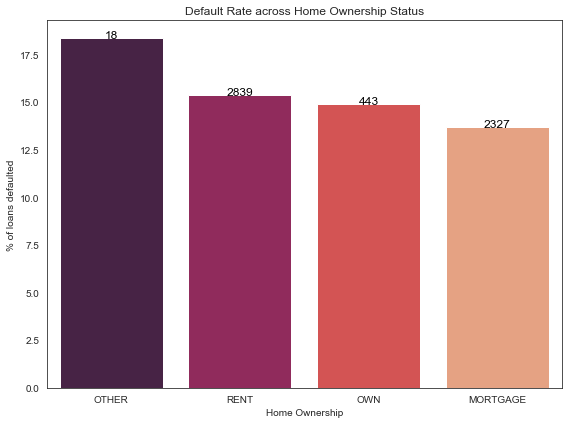

In [17]:
# Plotting Home Ownership status vs % Loan Charged off

sns.set_style("white")
fig = plt.figure(figsize=(8,6))

plt.title('Default Rate across Home Ownership Status')

ax = sns.barplot(x='home_ownership',y='percentage',data=tempdf,palette="rocket")

i=0

for index, row in tempdf.iterrows():
    ax.text(row.name,row.percentage,row['count'], color='black', ha="center",size=12)
    i=i+1
ax.set(ylabel='% of loans defaulted', xlabel='Home Ownership')

plt.setp(ax.get_xticklabels(), rotation=0)

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_HomeOwn.svg",format='svg')
plt.show()

In [18]:
# emp_length
tempdf=loan_df.groupby(['emp_length','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf[tempdf['loan_status']=='Charged Off'].sort_values(by=['percentage'],ascending=False).head(100).set_index('emp_length')

tempdf2=loan_df.groupby(['emp_length','loan_status'])['loan_status'].count().reset_index(name='count')
tempdf2=tempdf2[tempdf2['loan_status']=='Charged Off']

tempdf = pd.merge(tempdf2, tempdf, how='inner', on=['emp_length','loan_status']).sort_values(by=['percentage'],ascending=False).reset_index(drop=True)
tempdf.head(100)

## As we can see from the summary table below, across employment length, about 14% loans have defaulted, it looks like 
## employment length is not vital indicator of default

,emp_length,loan_status,count,percentage
0,10+ years,Charged Off,1331,15.680961
1,7 years,Charged Off,263,15.371128
2,1 year,Charged Off,456,14.389397
3,5 years,Charged Off,458,14.339386
4,< 1 year,Charged Off,639,14.174800
5,6 years,Charged Off,307,14.160517
6,8 years,Charged Off,203,14.146341
7,3 years,Charged Off,555,13.833500
8,4 years,Charged Off,462,13.824057
9,2 years,Charged Off,567,13.213703


In [19]:
# verification_status
tempdf=loan_df.groupby(['verification_status','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf[tempdf['loan_status']=='Charged Off'].sort_values(by=['percentage'],ascending=False).head(100).set_index('verification_status')

tempdf2=loan_df.groupby(['verification_status','loan_status'])['loan_status'].count().reset_index(name='count')
tempdf2=tempdf2[tempdf2['loan_status']=='Charged Off']

tempdf = pd.merge(tempdf2, tempdf, how='inner', on=['verification_status','loan_status']).sort_values(by=['percentage'],ascending=False).reset_index(drop=True)
tempdf.head(100)

# No business insight, expectation was that non verified loan status would have a higher default rate, data shows otherwise. 
# But this correlation is not an indicator of causality, we cannot ask business to stop verification 

,verification_status,loan_status,count,percentage
0,Verified,Charged Off,2051,16.803212
1,Source Verified,Charged Off,1434,14.818642
2,Not Verified,Charged Off,2142,12.830957


In [20]:
# addr_state
tempdf = loan_df.groupby(['addr_state','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off'].sort_values(by=['percentage'],ascending=False).head(100)
tempdf2=loan_df.groupby(['addr_state','loan_status'])['loan_status'].count().reset_index(name='count')
tempdf2=tempdf2[tempdf2['loan_status']=='Charged Off']

tempdf = pd.merge(tempdf2, tempdf, how='inner', on=['addr_state','loan_status']).sort_values(by=['percentage'],ascending=False).reset_index(drop=True)
tempdf.head(100)


# NE is an outlier
# Some Locations like NV, SD, AK, FL, ID.. are having high default rates compared to others.
# Count of loans given in NE,SD,AK,ID,HI,NM is very less

,addr_state,loan_status,count,percentage
0,NE,Charged Off,3,60.000000
1,NV,Charged Off,108,22.546973
2,SD,Charged Off,12,19.354839
3,AK,Charged Off,15,19.230769
4,FL,Charged Off,504,18.122977
5,MO,Charged Off,114,17.014925
6,HI,Charged Off,28,16.867470
7,ID,Charged Off,1,16.666667
8,NM,Charged Off,30,16.393443
9,OR,Charged Off,71,16.321839


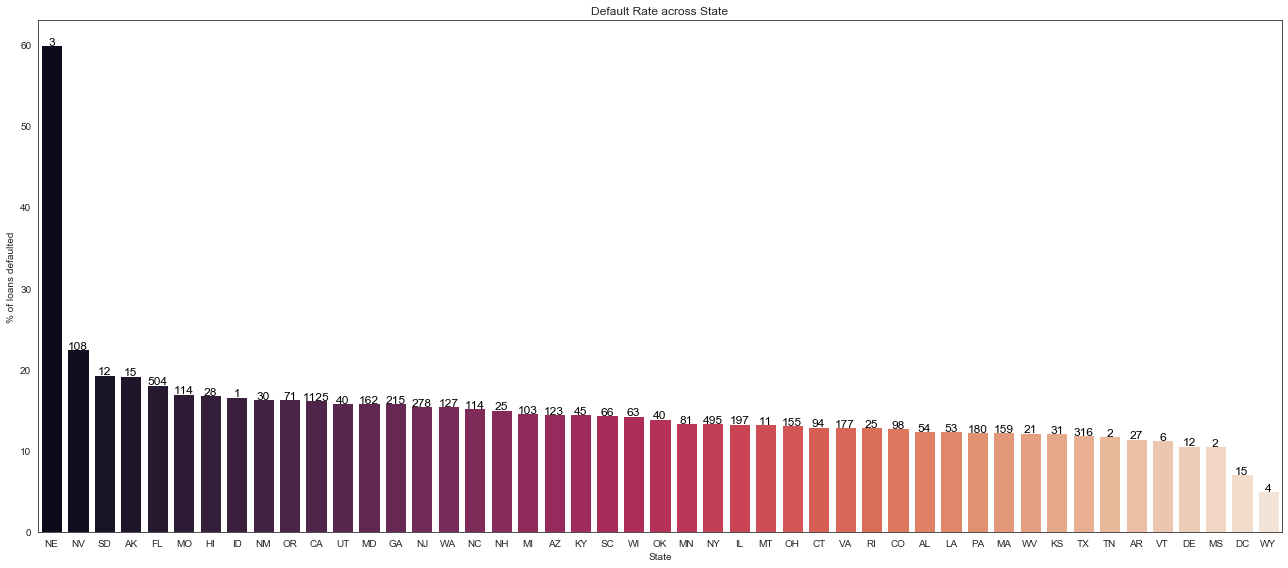

In [21]:
# Plotting Location vs % Loan Charged off

fig = plt.figure(figsize=(18,8))

plt.title('Default Rate across State')

ax = sns.barplot(x='addr_state',y='percentage',data=tempdf,palette="rocket")

i=0

for index, row in tempdf.iterrows():
    ax.text(row.name,row.percentage,row['count'], color='black', ha="center",size=12)
    i=i+1
ax.set(ylabel='% of loans defaulted', xlabel='State')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_state.svg",format='svg')
plt.show()

In [22]:
# Zip code is obvioulsy a lower hierarchial variable to state, so let's check if we can figure out if there are any specific areas which are prone to default. 
# Might indicate a economically backward area

pd.set_option('display.max_rows', 600)
tempdf=loan_df[['addr_state','zip_code','loan_status']].copy()
tempdf=tempdf.groupby(['addr_state','zip_code','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level= 0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf[tempdf['loan_status']=='Charged Off'].sort_values(by=['percentage'],ascending=False).head(100).set_index('addr_state')

## Overall - Two zip_code in NE show a very high default%
## One/Two zip_code in ID, HI, NV.. have high default % 

,zip_code,loan_status,percentage
addr_state,,,
NE,685xx,Charged Off,40.000000
NE,689xx,Charged Off,20.000000
ID,833xx,Charged Off,16.666667
NV,891xx,Charged Off,13.361169
HI,967xx,Charged Off,11.445783
NM,871xx,Charged Off,9.836066
RI,028xx,Charged Off,9.793814
AK,997xx,Charged Off,7.692308
UT,840xx,Charged Off,7.539683


#### inq_last_6mths

We did some internet research on why this variable is important:

If someone is out shopping for credit in several places and then they come to Lending Club looking for a loan then they are a higher risk borrower. They may have some serious financial problems if they are shopping for a lot of credit. But if someone is looking for a loan and comes to p2p lending first then they are a better credit risk. One inquiry on a credit report doesn’t make a big difference but the numbers show that these borrowers are still a higher risk than borrowers with no inquiries at all in the past six months.

In [23]:
# inq_last_6mths
tempdf=loan_df.groupby(['inq_last_6mths','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off'].sort_values(by=['percentage'],ascending=False)

tempdf2=loan_df.groupby(['inq_last_6mths','loan_status'])['loan_status'].count().reset_index(name='count')
tempdf2=tempdf2[tempdf2['loan_status']=='Charged Off']

tempdf = pd.merge(tempdf2, tempdf, how='inner', on=['inq_last_6mths','loan_status'])
tempdf.head(100)

#More the number of inqueries, higher the default rate

,inq_last_6mths,loan_status,count,percentage
0,0,Charged Off,2280,12.186648
1,1,Charged Off,1677,15.731707
2,2,Charged Off,943,16.678458
3,3,Charged Off,619,20.750922
4,4,Charged Off,51,16.139241
5,5,Charged Off,28,19.444444
6,6,Charged Off,16,25.396825
7,7,Charged Off,10,29.411765
8,8,Charged Off,3,21.428571


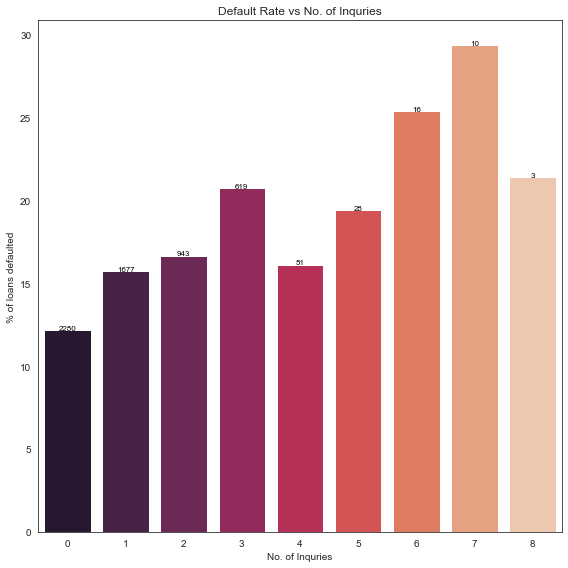

In [24]:
# Plotting No. of Inq in the last 6months vs % Loan Charged-Off
# Plotting the data for PPT

fig = plt.figure(figsize=(8,8))

plt.title('Default Rate vs No. of Inquries')

ax = sns.barplot(x='inq_last_6mths',y='percentage',data=tempdf,palette="rocket")

i=0

for index, row in tempdf.iterrows():
    ax.text(row.name,row.percentage,row['count'], color='black', ha="center",size=8)
    i=i+1
ax.set(ylabel='% of loans defaulted', xlabel='No. of Inquries')

plt.setp(ax.get_xticklabels(), rotation=0)

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_inq_last_6mths.svg",format='svg')
plt.show()

In [25]:
# delinq_2yrs - This parameter indicates the past consumer behaviour, and hence lets check for it any default patterns.
# this is generated after the loan is approved so not relevant as a driver variable 
tempdf=loan_df.groupby(['delinq_2yrs','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf[tempdf['loan_status']=='Charged Off'].sort_values(by=['percentage'],ascending=False)

#delinq_2yrs no spefic trend, assumption was higher delinq would show higher default - 7,8 had high defaults but so did 2,4

,delinq_2yrs,loan_status,percentage
16,8,Charged Off,50.000000
14,7,Charged Off,25.000000
8,4,Charged Off,21.666667
4,2,Charged Off,19.316493
6,3,Charged Off,16.509434
2,1,Charged Off,15.809167
0,0,Charged Off,14.354679
10,5,Charged Off,14.285714
12,6,Charged Off,10.000000


In [26]:
# mths_since_last_delinq
# this is generated after the loan is approved so not relevant as a driver variable 
tempdf=loan_df.groupby(['mths_since_last_delinq','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf[tempdf['loan_status']=='Charged Off'].head(100)

# No trend, default rate has no general trend end values tended to spike more

,mths_since_last_delinq,loan_status,percentage
0,0.0,Charged Off,15.124153
2,1.0,Charged Off,20.689655
4,2.0,Charged Off,16.831683
6,3.0,Charged Off,13.986014
8,4.0,Charged Off,17.006803
10,5.0,Charged Off,14.482759
12,6.0,Charged Off,17.553191
14,7.0,Charged Off,20.348837
16,8.0,Charged Off,12.727273
18,9.0,Charged Off,18.713450


In [27]:
#pub_rec
tempdf=loan_df.groupby(['pub_rec','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off'].sort_values(by=['percentage'],ascending=False)

tempdf2=loan_df.groupby(['pub_rec','loan_status'])['loan_status'].count().reset_index(name='count')
tempdf2=tempdf2[tempdf2['loan_status']=='Charged Off']

tempdf = pd.merge(tempdf2, tempdf, how='inner', on=['pub_rec','loan_status'])
tempdf.head(100)

# People with more derogatory public record tend to default more

,pub_rec,loan_status,count,percentage
0,0,Charged Off,5160,14.134276
1,1,Charged Off,457,22.702434
2,2,Charged Off,10,20.833333


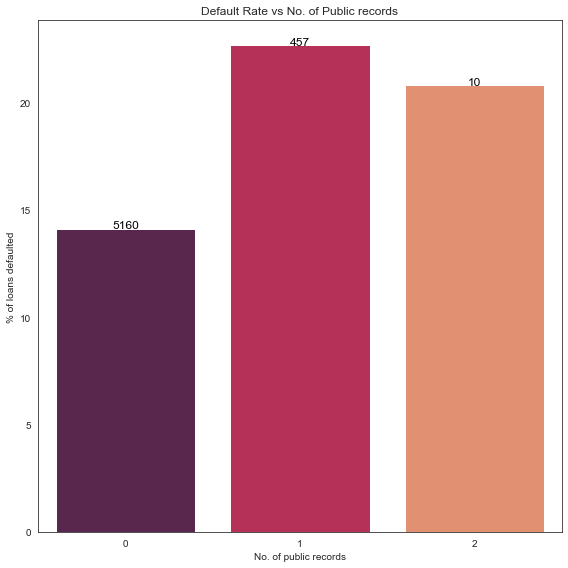

In [28]:
# Plotting No. of derogatory public records vs % Loan Charged-Off

fig = plt.figure(figsize=(8,8))

plt.title('Default Rate vs No. of Public records')

ax = sns.barplot(x='pub_rec',y='percentage',data=tempdf,palette="rocket")

i=0

for index, row in tempdf.iterrows():
    ax.text(row.name,row.percentage,row['count'], color='black', ha="center",size=12)
    i=i+1
ax.set(ylabel='% of loans defaulted', xlabel='No. of public records')

plt.setp(ax.get_xticklabels(), rotation=0)

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_inq_pub_rec.svg",format='svg')
plt.show()

In [29]:
#pub_rec_bankruptcies
tempdf=loan_df.groupby(['pub_rec_bankruptcies','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off'].sort_values(by=['percentage'],ascending=False)


tempdf2=loan_df.groupby(['pub_rec_bankruptcies','loan_status'])['loan_status'].count().reset_index(name='count')
tempdf2=tempdf2[tempdf2['loan_status']=='Charged Off']

tempdf = pd.merge(tempdf2, tempdf, how='inner', on=['pub_rec_bankruptcies','loan_status'])
tempdf.head(100)

## Borrowers with more number of public bankruptcy record tended to default more

,pub_rec_bankruptcies,loan_status,count,percentage
0,0.0,Charged Off,5141,14.186765
1,1.0,Charged Off,366,22.357972
2,2.0,Charged Off,2,40.000000


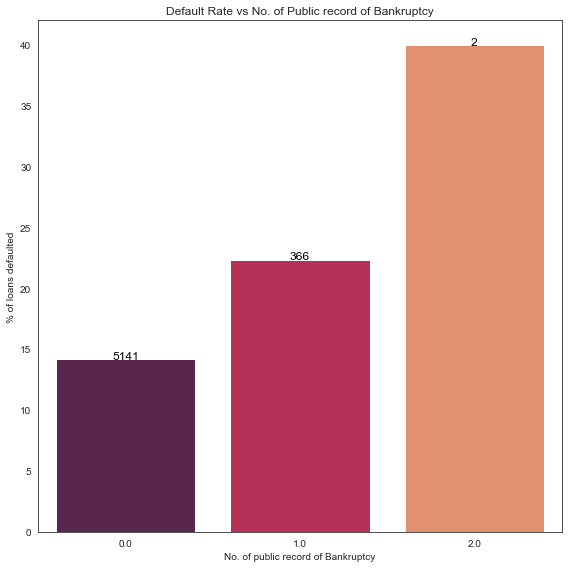

In [30]:
# Plotting No. of Public Record Bankruptcies vs % Loan Charged-Off

fig = plt.figure(figsize=(8,8))

plt.title('Default Rate vs No. of Public record of Bankruptcy')

ax = sns.barplot(x='pub_rec_bankruptcies',y='percentage',data=tempdf,palette="rocket")

i=0

for index, row in tempdf.iterrows():
    ax.text(row.name,row.percentage,row['count'], color='black', ha="center",size=12)
    i=i+1
ax.set(ylabel='% of loans defaulted', xlabel='No. of public record of Bankruptcy')

plt.setp(ax.get_xticklabels(), rotation=0)

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_inq_pub_rec_bank.svg",format='svg')
plt.show()

#### Binning variables to analyze

For binning we are using qcut pandas operation. The qcut is quantile based discretization function and creates equal bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins. At the least interval we are finding in some cases, the bin is negative. This however doesn;t affect our analysis.

In [31]:
#annual_inc
tempdf=loan_df[['annual_inc','loan_status']].copy()
tempdf['annual_inc_bin']=pd.qcut(loan_df['annual_inc'], q=7,precision=0)
tempdf=tempdf.groupby(['annual_inc_bin','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf=tempdf[tempdf['loan_status']=='Charged Off']

tempdf2=loan_df[['annual_inc','loan_status']].copy()
tempdf2['annual_inc_bin']=pd.qcut(loan_df['annual_inc'], q=7,precision=0)
tempdf2=tempdf2.groupby(['annual_inc_bin','loan_status'])['loan_status'].count().reset_index(name='count')
tempdf2=tempdf2[tempdf2['loan_status']=='Charged Off']


tempdf = pd.merge(tempdf2, tempdf, how='inner', on=['annual_inc_bin','loan_status'])
tempdf.head(100)

# Consumers with higher annual income tended to default much less

,annual_inc_bin,loan_status,count,percentage
0,"(3999.0, 33000.0]",Charged Off,1016,18.365871
1,"(33000.0, 43000.0]",Charged Off,950,17.015941
2,"(43000.0, 52800.0]",Charged Off,829,15.191497
3,"(52800.0, 63996.0]",Charged Off,833,15.175806
4,"(63996.0, 78000.0]",Charged Off,763,13.454417
5,"(78000.0, 100000.0]",Charged Off,644,12.005966
6,"(100000.0, 6000000.0]",Charged Off,592,10.800949


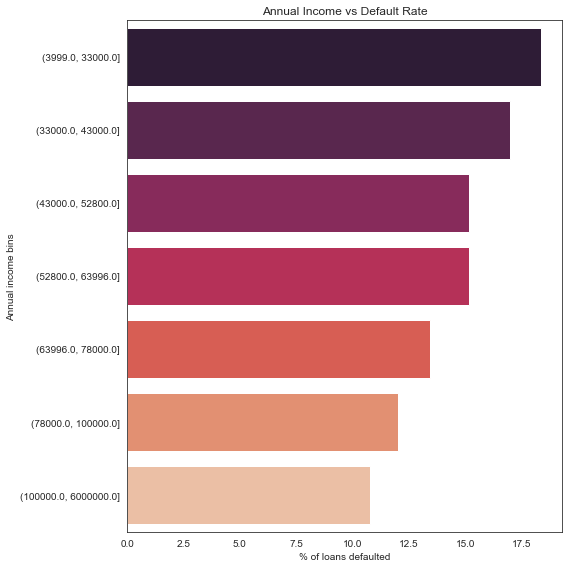

In [32]:
# Plotting Annual Income vs % Loan Charged-Off

fig = plt.figure(figsize=(8,8))

plt.title('Annual Income vs Default Rate')

ax = sns.barplot(x='percentage',y='annual_inc_bin',data=tempdf,palette="rocket")

ax.set(xlabel='% of loans defaulted', ylabel='Annual income bins')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_annl_inc.svg",format='svg')
plt.show()

In [33]:
#dti - Debt-to-Income Ratio
tempdf=loan_df[['dti','loan_status']].copy()
tempdf['dti_bin']=pd.qcut(tempdf['dti'], q=15,precision=0)
tempdf=tempdf.groupby(['dti_bin','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off']
tempdf.head(100)
#  As the dti increases the default chances increase
## Significance - dti is [monthly debt payments, excluding mortgage and LC loan / monthly income]
##                Higher the debt, higher the dti, and hence higher the possibility of borrower defaulting.

,dti_bin,loan_status,percentage
0,"(-1.0, 3.0]",Charged Off,12.659698
2,"(3.0, 5.0]",Charged Off,11.975117
4,"(5.0, 7.0]",Charged Off,12.085770
6,"(7.0, 9.0]",Charged Off,12.878200
8,"(9.0, 10.0]",Charged Off,13.413686
10,"(10.0, 11.0]",Charged Off,13.495746
12,"(11.0, 13.0]",Charged Off,14.335938
14,"(13.0, 14.0]",Charged Off,15.186916
16,"(14.0, 15.0]",Charged Off,14.758567
18,"(15.0, 17.0]",Charged Off,15.620155


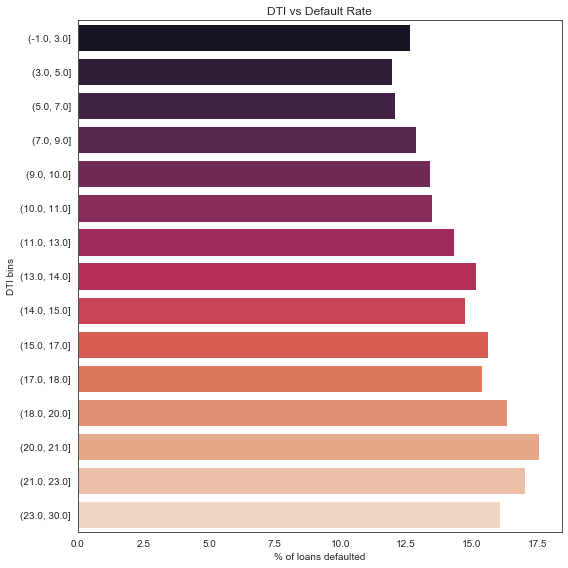

In [34]:
# Plotting Dti vs % Loan Charged-Off

fig = plt.figure(figsize=(8,8))

plt.title('DTI vs Default Rate')

ax = sns.barplot(x='percentage',y='dti_bin',data=tempdf,palette="rocket")

ax.set(xlabel='% of loans defaulted', ylabel='DTI bins')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_dti.svg",format='svg')
plt.show()

In [35]:
# Derived variable % of annual income taken as loan (funded loan) -- (Data-Driven Metrics)

tempdf=loan_df[['annual_inc','funded_amnt','loan_status']].copy()
tempdf['funded_incm_percent']=round(100*tempdf['funded_amnt']/tempdf['annual_inc'],0)
tempdf['funded_incm_percent_bin']=pd.cut(tempdf['funded_incm_percent'], bins = 10, precision=0)
tempdf=tempdf.groupby(['funded_incm_percent_bin','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off']
tempdf.head(100)
# The moment % of annual income taken as loan crosses 25% the default rate tend to jump

,funded_incm_percent_bin,loan_status,percentage
0,"(-0.1, 8.0]",Charged Off,11.357341
2,"(8.0, 17.0]",Charged Off,11.838812
4,"(17.0, 25.0]",Charged Off,14.390733
6,"(25.0, 33.0]",Charged Off,18.620087
8,"(33.0, 42.0]",Charged Off,21.865510
10,"(42.0, 50.0]",Charged Off,24.360190
12,"(50.0, 58.0]",Charged Off,33.333333
14,"(58.0, 66.0]",Charged Off,22.222222
16,"(66.0, 75.0]",Charged Off,32.000000
18,"(75.0, 83.0]",Charged Off,33.333333


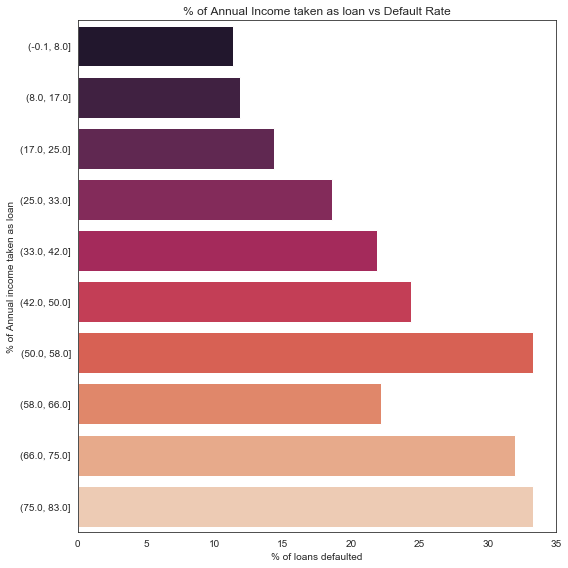

In [36]:
# Plotting Loan as % of Income vs % Loans Charged-Off

fig = plt.figure(figsize=(8,8))

plt.title('% of Annual Income taken as loan vs Default Rate')

ax = sns.barplot(x='percentage',y='funded_incm_percent_bin',data=tempdf,palette="rocket")

ax.set(xlabel='% of loans defaulted', ylabel='% of Annual income taken as loan')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_prnctofincm.svg",format='svg')
plt.show()

In [37]:
#mths_since_last_record
tempdf=loan_df[['mths_since_last_record','loan_status']].copy()
tempdf['mths_since_last_record_bin']=pd.qcut(tempdf['mths_since_last_record'], q=25,precision=0,duplicates='drop')
tempdf=tempdf.groupby(['mths_since_last_record_bin','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf=tempdf[tempdf['loan_status']=='Charged Off']

tempdf.head(100)

# more than 58 day bucket had a very high default rate, but there is no definite trend as can be seen from the graph

,mths_since_last_record_bin,loan_status,percentage
0,"(-1.0, 39.0]",Charged Off,16.775033
2,"(39.0, 57.0]",Charged Off,17.857143
4,"(57.0, 70.0]",Charged Off,21.428571
6,"(70.0, 82.0]",Charged Off,33.653846
8,"(82.0, 87.0]",Charged Off,19.736842
10,"(87.0, 89.0]",Charged Off,25.233645
12,"(89.0, 91.0]",Charged Off,20.879121
14,"(91.0, 93.0]",Charged Off,21.052632
16,"(93.0, 96.0]",Charged Off,24.137931
18,"(96.0, 98.0]",Charged Off,26.086957


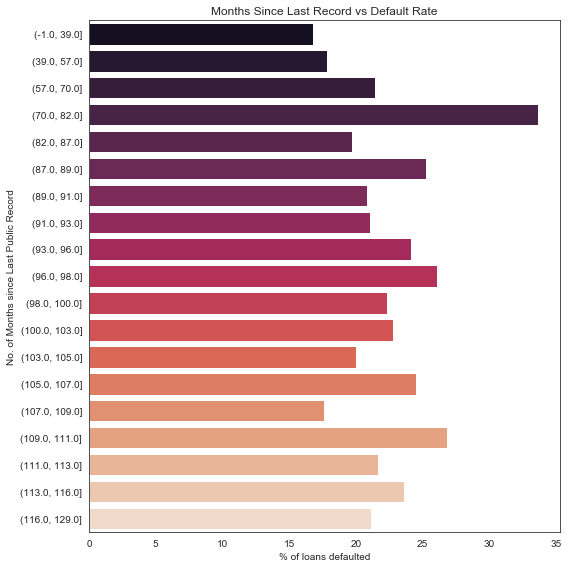

In [38]:
# Plotting No. of Months since last public record vs % Loan Charged-Off

fig = plt.figure(figsize=(8,8))

plt.title('Months Since Last Record vs Default Rate')

ax = sns.barplot(x='percentage',y='mths_since_last_record_bin',data=tempdf,palette="rocket")

ax.set(xlabel='% of loans defaulted', ylabel='No. of Months since Last Public Record')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_mths_since_last_record_bin.svg",format='svg')
plt.show()

In [39]:
#mths_since_last_delinq
#this is generated after the loan is approved so not relevant as a driver variable 
tempdf=loan_df[['mths_since_last_delinq','loan_status']].copy()
tempdf['mths_since_last_delinq_bin']=pd.qcut(tempdf['mths_since_last_delinq'], q=10,precision=0,duplicates='drop')
tempdf=tempdf.groupby(['mths_since_last_delinq_bin','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf[tempdf['loan_status']=='Charged Off'].head(100)


# No trend

,mths_since_last_delinq_bin,loan_status,percentage
0,"(-1.0, 7.0]",Charged Off,16.374269
2,"(7.0, 15.0]",Charged Off,17.102616
4,"(15.0, 21.0]",Charged Off,15.950920
6,"(21.0, 27.0]",Charged Off,15.275708
8,"(27.0, 34.0]",Charged Off,12.811634
10,"(34.0, 40.0]",Charged Off,13.707165
12,"(40.0, 47.0]",Charged Off,16.294160
14,"(47.0, 57.0]",Charged Off,16.131441
16,"(57.0, 69.0]",Charged Off,15.401460
18,"(69.0, 120.0]",Charged Off,17.572599


In [40]:
#open_acc
tempdf=loan_df[['open_acc','loan_status']].copy()
tempdf['open_acc_bin']=pd.qcut(tempdf['open_acc'], q=10,precision=0,duplicates='drop')
tempdf=tempdf.groupby(['open_acc_bin','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf[tempdf['loan_status']=='Charged Off'].head(100)


# No trend

,open_acc_bin,loan_status,percentage
0,"(1.0, 4.0]",Charged Off,17.155291
2,"(4.0, 6.0]",Charged Off,13.914043
4,"(6.0, 7.0]",Charged Off,14.249169
6,"(7.0, 8.0]",Charged Off,14.315679
8,"(8.0, 9.0]",Charged Off,14.360965
10,"(9.0, 10.0]",Charged Off,15.014530
12,"(10.0, 11.0]",Charged Off,14.328582
14,"(11.0, 13.0]",Charged Off,13.915618
16,"(13.0, 15.0]",Charged Off,14.963078
18,"(15.0, 44.0]",Charged Off,13.946252


In [41]:
# Derived variable  --- (Data-Driven Metrics)

tempdf=loan_df[['total_acc','open_acc','loan_status']].copy()
tempdf['closedacc']=tempdf['total_acc']-tempdf['open_acc']

tempdf['closedacc_bin']=pd.qcut(tempdf['closedacc'], q=25,precision=0,duplicates='drop')
tempdf=tempdf.groupby(['closedacc_bin','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off']
tempdf.head(100)

## Accounts with more closed loans had a comparitively lesser chance of defaulting

,closedacc_bin,loan_status,percentage
0,"(-7.0, 1.0]",Charged Off,16.722090
2,"(1.0, 2.0]",Charged Off,16.790792
4,"(2.0, 3.0]",Charged Off,16.647128
6,"(3.0, 4.0]",Charged Off,16.793893
8,"(4.0, 5.0]",Charged Off,16.535433
10,"(5.0, 6.0]",Charged Off,15.667718
12,"(6.0, 7.0]",Charged Off,13.969425
14,"(7.0, 8.0]",Charged Off,14.457831
16,"(8.0, 9.0]",Charged Off,13.988764
18,"(9.0, 10.0]",Charged Off,13.818807


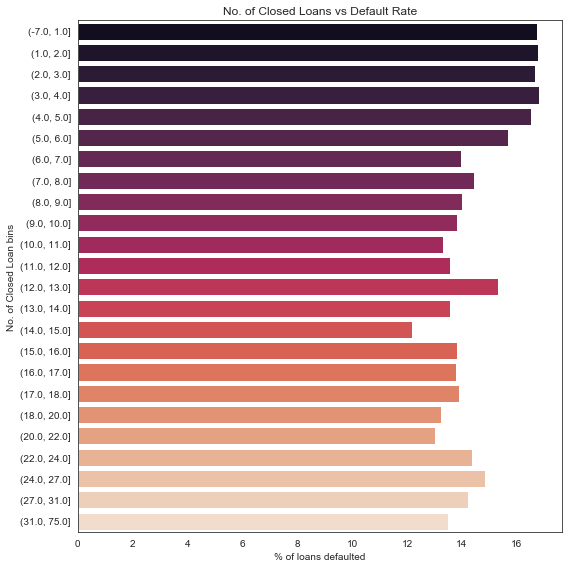

In [42]:
# Plotting No. of Closed Loans vs % Loan Charged-Off
fig = plt.figure(figsize=(8,8))

plt.title('No. of Closed Loans vs Default Rate')

ax = sns.barplot(x='percentage',y='closedacc_bin',data=tempdf,palette="rocket")

ax.set(xlabel='% of loans defaulted', ylabel='No. of Closed Loan bins')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_closed_loans.svg",format='svg')
plt.show()

In [43]:
#annual_inc across different grades vs default rates
tempdf=loan_df[['annual_inc','grade','loan_status']].copy()
tempdf['annual_inc_bin']=pd.qcut(loan_df['annual_inc'], q=7,precision=0)
tempdf=tempdf.groupby(['annual_inc_bin','grade','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off']

tempdf.head(100)

# Consumers with lower to medium annual income and with grades B/C/D tend to default much more.

,annual_inc_bin,grade,loan_status,percentage
0,"(3999.0, 33000.0]",A,Charged Off,2.639190
2,"(3999.0, 33000.0]",B,Charged Off,5.404917
4,"(3999.0, 33000.0]",C,Charged Off,4.663774
6,"(3999.0, 33000.0]",D,Charged Off,3.579176
8,"(3999.0, 33000.0]",E,Charged Off,1.536515
10,"(3999.0, 33000.0]",F,Charged Off,0.361533
12,"(3999.0, 33000.0]",G,Charged Off,0.180766
14,"(33000.0, 43000.0]",A,Charged Off,2.256851
16,"(33000.0, 43000.0]",B,Charged Off,4.603260
18,"(33000.0, 43000.0]",C,Charged Off,4.459968


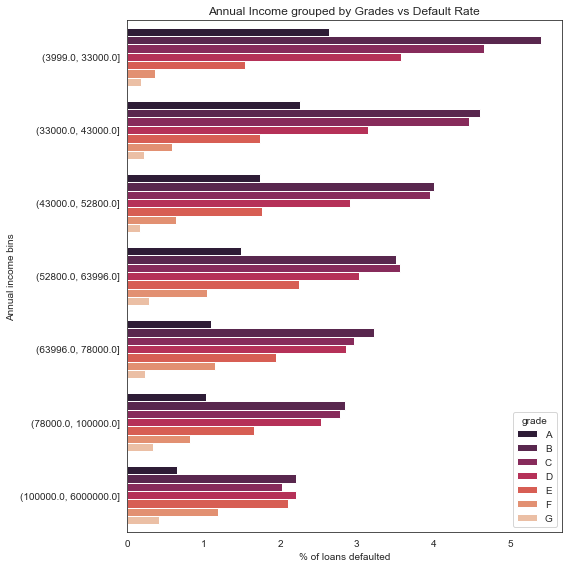

In [44]:
# Plotting Annual Income grouped by Grades vs % Loan Charged-Off

fig = plt.figure(figsize=(8,8))

plt.title('Annual Income grouped by Grades vs Default Rate')

ax = sns.barplot(x='percentage',y='annual_inc_bin',hue='grade',data=tempdf,palette="rocket")

ax.set(xlabel='% of loans defaulted', ylabel='Annual income bins')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_annl_inc_GradeGrouped.svg",format='svg')
plt.show()

Customer Attributes: Observations on Consumer's Defaulting Tendency:


1. Annual Income: People in the low income group had higher chances of default.

2. % of income taken as loan: The moment more than 25% of annual income is taken as loan, the default chances rise.

3. Bankruptcy: People with a history of Bankruptcy tended to default more.

4. More DTI more default, i.e., higher the monthly debt payment towards debt obligations (excluding LC loan) as a % of monthly income, higher the defaulting chances.

5. People with more public derogatory record tend to default more

6. More number of inqueries more default rate

7. Location: Specific states and zip codes had a higher default rate

8. In Home ownership, OTHER catagory have 18% default rate which is approximately 4% higher the overall default percentage

### Analyzing Loan attributes

In [45]:
# Check the correlation between numerical variables if we can identify someting odd

corr = loan_df[['loan_amnt','funded_amnt','funded_amnt_inv','annual_inc']].corr()
corr.style.background_gradient(cmap='coolwarm')

# Nothing odd noticed, most of these variables are expected to be correlated

,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc
loan_amnt,1,0.98179,0.937922,0.268999
funded_amnt,0.98179,1,0.956172,0.264798
funded_amnt_inv,0.937922,0.956172,1,0.251981
annual_inc,0.268999,0.264798,0.251981,1


In [46]:
#loan interest rate - converting to float
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%','').astype(float)

In [47]:
#loan interest rate

tempdf=loan_df[['int_rate','loan_status']].copy()
tempdf['int_rate_bin']=pd.qcut(tempdf['int_rate'], q=10,precision=0,duplicates='drop')
tempdf=tempdf.groupby(['int_rate_bin','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off']
tempdf.head(100)

# Higher interest almost lead to proportional growth in default rate
## Significance - Higher interest rate increases the chances of borrower defaulting

,int_rate_bin,loan_status,percentage
0,"(4.0, 7.0]",Charged Off,4.682274
2,"(7.0, 8.0]",Charged Off,6.088320
4,"(8.0, 10.0]",Charged Off,9.126788
6,"(10.0, 11.0]",Charged Off,11.393000
8,"(11.0, 12.0]",Charged Off,14.166388
10,"(12.0, 13.0]",Charged Off,15.103903
12,"(13.0, 14.0]",Charged Off,15.846712
14,"(14.0, 15.0]",Charged Off,18.506751
16,"(15.0, 17.0]",Charged Off,21.683673
18,"(17.0, 24.0]",Charged Off,30.945406


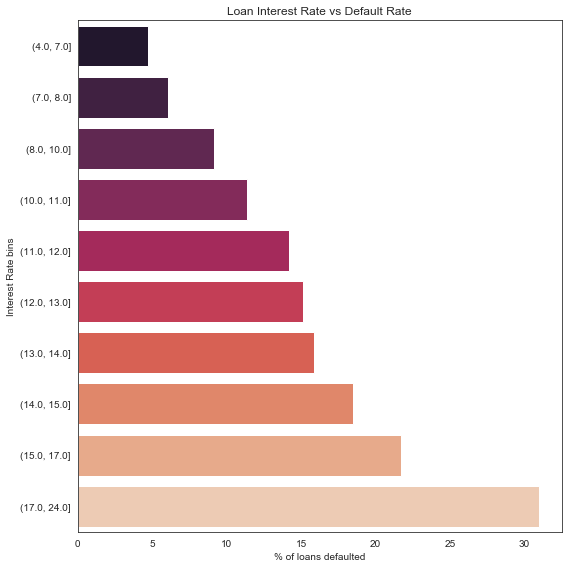

In [48]:
# Plotting LC loan Interest Rate vs % Loan Charged-Off

fig = plt.figure(figsize=(8,8))

plt.title('Loan Interest Rate vs Default Rate')

ax = sns.barplot(x='percentage',y='int_rate_bin',data=tempdf,palette="rocket")

ax.set(xlabel='% of loans defaulted', ylabel='Interest Rate bins')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_int_rate_bin.svg",format='svg')
plt.show()

In [49]:
# purpose
tempdf=loan_df.groupby(['purpose','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off'].sort_values(by=['percentage'],ascending=False).head(100)

tempdf2=loan_df.groupby(['purpose','loan_status'])['loan_status'].count().reset_index(name='count')
tempdf2=tempdf2[tempdf2['loan_status']=='Charged Off']

tempdf = pd.merge(tempdf2, tempdf, how='inner', on=['purpose','loan_status']).sort_values(by=['percentage'],ascending=False).reset_index(drop=True)
tempdf.head(100)

# In this we can see some trends: small_business, renewable_energy, educational tended to default much more than the 
# other categories. The total number of loans given in  renewable_energy, educational are low though.

,purpose,loan_status,count,percentage
0,small_business,Charged Off,475,27.080958
1,renewable_energy,Charged Off,19,18.627451
2,educational,Charged Off,56,17.230769
3,other,Charged Off,633,16.377749
4,house,Charged Off,59,16.076294
5,moving,Charged Off,92,15.972222
6,medical,Charged Off,106,15.565345
7,debt_consolidation,Charged Off,2767,15.325395
8,vacation,Charged Off,53,14.133333
9,home_improvement,Charged Off,347,12.069565


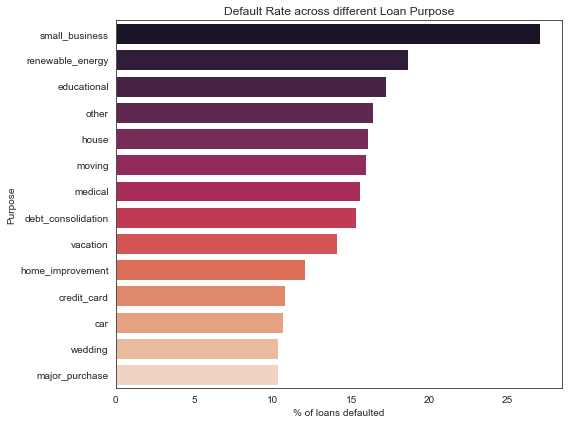

In [50]:
# Plotting purpose vs % Loan Charged-Off

fig = plt.figure(figsize=(8,6))

plt.title('Default Rate across different Loan Purpose')

ax = sns.barplot(x='percentage',y='purpose',data=tempdf,palette="rocket")

ax.set(xlabel='% of loans defaulted', ylabel='Purpose')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_purpose.svg",format='svg')
plt.show()

In [51]:
# Total Annual Installment as a percentage of annual income -- Derived Variable (Data Driven Metrics)

tempdf=loan_df[['installment','annual_inc','loan_status']].copy()
tempdf['per_annualincm_annualinst']=round(100*(tempdf['installment']*12)/tempdf['annual_inc'],2)

tempdf['per_annualincm_annualinst_bin']=pd.qcut(tempdf['per_annualincm_annualinst'], q=10,precision=0,duplicates='drop')
tempdf=tempdf.groupby(['per_annualincm_annualinst_bin','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off']
tempdf.head(100)
# More than 8% shows a jump in default rate, however this is sort of similar to DTI so will be using it instead

,per_annualincm_annualinst_bin,loan_status,percentage
0,"(-1.0, 2.0]",Charged Off,11.016071
2,"(2.0, 3.0]",Charged Off,12.104043
4,"(3.0, 4.0]",Charged Off,12.460897
6,"(4.0, 5.0]",Charged Off,12.386863
8,"(5.0, 6.0]",Charged Off,13.338513
10,"(6.0, 7.0]",Charged Off,14.151925
12,"(7.0, 8.0]",Charged Off,14.141414
14,"(8.0, 10.0]",Charged Off,17.094017
16,"(10.0, 12.0]",Charged Off,18.495460
18,"(12.0, 32.0]",Charged Off,20.695923


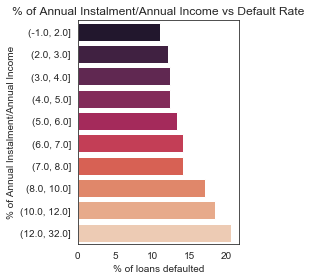

In [52]:
# Plotting Annual Installment as a % of Annual Income vs % Loan Charged-Off

fig = plt.figure(figsize=(4,4))

plt.title('% of Annual Instalment/Annual Income vs Default Rate')

ax = sns.barplot(x='percentage',y='per_annualincm_annualinst_bin',data=tempdf,palette="rocket")

ax.set(xlabel='% of loans defaulted', ylabel='% of Annual Instalment/Annual Income')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_per_annualincm_annualinst_bin.svg",format='svg')
plt.show()

In [53]:
# Grade
tempdf=loan_df.groupby(['grade','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off']
tempdf.head(100)

# As grade decreased default increased proportionately
## Low Grade borrowers are risky candidates and are more likely to default.

,grade,loan_status,percentage
0,A,Charged Off,5.993031
2,B,Charged Off,12.205567
4,C,Charged Off,17.194281
6,D,Charged Off,21.986234
8,E,Charged Off,26.849418
10,F,Charged Off,32.684426
12,G,Charged Off,33.779264


In [54]:
# SubGrade
tempdf=loan_df.groupby(['sub_grade','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off']
tempdf.head(100)

# Subgrade is nothing but the split of grades and the behavior is exactly same as grade

,sub_grade,loan_status,percentage
0,A1,Charged Off,2.633889
2,A2,Charged Off,4.907162
4,A3,Charged Off,5.690608
6,A4,Charged Off,6.195614
8,A5,Charged Off,7.992634
10,B1,Charged Off,9.515860
12,B2,Charged Off,11.394303
14,B3,Charged Off,12.070796
16,B4,Charged Off,13.500205
18,B5,Charged Off,13.613767


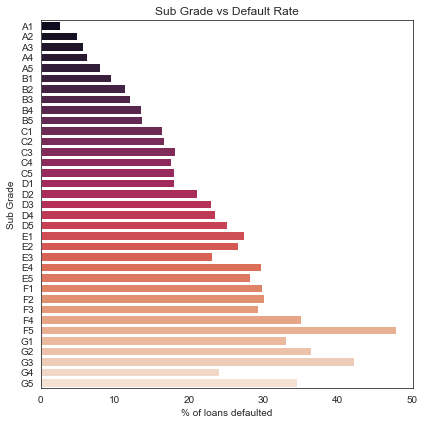

In [55]:
# We will plot the Sub grade as it gives more granular information compared to grade 
# Plotting Sub-Grade vs % Loan Charged-Off

fig = plt.figure(figsize=(6,6))

plt.title('Sub Grade vs Default Rate')

ax = sns.barplot(x='percentage',y='sub_grade',data=tempdf,palette="rocket")

ax.set(xlabel='% of loans defaulted', ylabel='Sub Grade')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_sub_grade.svg",format='svg')
plt.show()

In [56]:
# Loan interest rate across different Grades
tempdf=loan_df[['int_rate','grade']].copy()
tempdf['int_rate_bin']=pd.qcut(tempdf['int_rate'], q=10,precision=0,duplicates='drop')
tempdf = tempdf.groupby(['grade','int_rate_bin']).count()
tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# The lower grades have mucher higher interest rates which shows why they default more.

int_rate
grade int_rate_bin            
A     (4.0, 7.0]     41.523146
      (7.0, 8.0]     38.098556
      (8.0, 10.0]    20.378298
      (10.0, 11.0]         NaN
      (11.0, 12.0]         NaN
      (12.0, 13.0]         NaN
      (13.0, 14.0]         NaN
      (14.0, 15.0]         NaN
      (15.0, 17.0]         NaN
      (17.0, 24.0]         NaN
B     (4.0, 7.0]      0.042827
      (7.0, 8.0]           NaN
      (8.0, 10.0]    17.190578
      (10.0, 11.0]   35.880086
      (11.0, 12.0]   23.965739
      (12.0, 13.0]   22.920771
      (13.0, 14.0]         NaN
      (14.0, 15.0]         NaN
      (15.0, 17.0]         NaN
      (17.0, 24.0]         NaN
C     (4.0, 7.0]      0.051059
      (7.0, 8.0]           NaN
      (8.0, 10.0]          NaN
      (10.0, 11.0]    0.868011
      (11.0, 12.0]    2.489150
      (12.0, 13.0]   15.292316
      (13.0, 14.0]   47.485320
      (14.0, 15.0]   26.665816
      (15.0, 17.0]    7.148328
      (17.0, 24.0]         NaN
D     (4.0, 7.0]      0.078663
      (7.0, 8.0]           NaN
      (8.0, 10.0]          NaN
      (10.0, 11.0]         NaN
      (11.0, 12.0]         NaN
      (12.0, 13.0]    1.415929
      (13.0, 14.0]    2.654867
      (14.0, 15.0]   32.094395
      (15.0, 17.0]   47.728614
      (17.0, 24.0]   16.027532
E     (4.0, 7.0]      0.075103
      (7.0, 8.0]           NaN
      (8.0, 10.0]          NaN
      (10.0, 11.0]         NaN
      (11.0, 12.0]         NaN
      (12.0, 13.0]         NaN
      (13.0, 14.0]    0.262861
      (14.0, 15.0]    2.027788
      (15.0, 17.0]   34.322193
      (17.0, 24.0]   63.312054
F     (4.0, 7.0]           NaN
      (7.0, 8.0]           NaN
      (8.0, 10.0]          NaN
      (10.0, 11.0]         NaN
      (11.0, 12.0]         NaN
      (12.0, 13.0]         NaN
      (13.0, 14.0]         NaN
      (14.0, 15.0]    0.204918
      (15.0, 17.0]    1.946721
      (17.0, 24.0]   97.848361
G     (4.0, 7.0]           NaN
      (7.0, 8.0]           NaN
      (8.0, 10.0]          NaN
      (10.0, 11.0]         NaN
      (11.0, 12.0]         NaN
      (12.0, 13.0]         NaN
      (13.0, 14.0]         NaN
      (14.0, 15.0]         NaN
      (15.0, 17.0]         NaN
      (17.0, 24.0]  100.000000

In [57]:
#loan purpose across different grades vs default rates (Only checking top-5 high default rate loan purposes across grades)
tempdf=loan_df[['purpose','grade','loan_status']].copy()
tempdf=tempdf.groupby(['purpose','grade','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off']
tempdf = tempdf[tempdf['purpose'].isin(['renewable_energy','educational','small_business','other','house','moving'])]

tempdf.head(100)

# Consumers borrowing with purpose: small business, educational or renewable energy and having grades B/C/D tend to default more.

,purpose,grade,loan_status,percentage
42,educational,A,Charged Off,1.538462
44,educational,B,Charged Off,6.153846
46,educational,C,Charged Off,4.307692
48,educational,D,Charged Off,3.076923
50,educational,E,Charged Off,1.846154
52,educational,F,Charged Off,0.307692
69,house,A,Charged Off,0.817439
71,house,B,Charged Off,2.724796
73,house,C,Charged Off,3.542234
75,house,D,Charged Off,3.269755


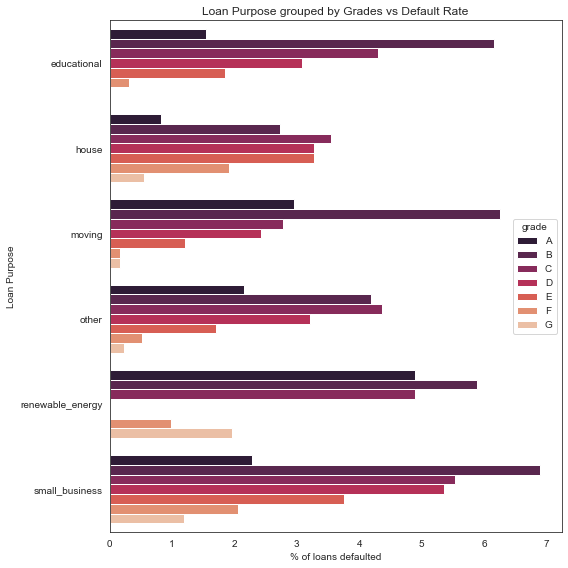

In [58]:
# Plotting Loan Purpose grouped by Grades vs % Loan Charged-Off

fig = plt.figure(figsize=(8,8))

plt.title('Loan Purpose grouped by Grades vs Default Rate')

ax = sns.barplot(x='percentage',y='purpose',hue='grade',data=tempdf,palette="rocket")

ax.set(xlabel='% of loans defaulted', ylabel='Loan Purpose')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_purpose_GradeGrouped.svg",format='svg')
plt.show()

In [59]:
#Loan Status over different loan terms
tempdf=loan_df.groupby(['term','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf = tempdf[tempdf['loan_status']=='Charged Off'].sort_values(by=['percentage'],ascending=False)

tempdf2=loan_df.groupby(['term','loan_status'])['loan_status'].count().reset_index(name='count')
tempdf2=tempdf2[tempdf2['loan_status']=='Charged Off']

tempdf = pd.merge(tempdf2, tempdf, how='inner', on=['term','loan_status'])
tempdf.head(100)

## Longer the loan term, higher the tendency to default.

,term,loan_status,count,percentage
0,36 months,Charged Off,3227,11.090872
1,60 months,Charged Off,2400,25.313785


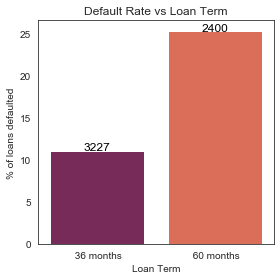

In [60]:
# Plotting Loan Term vs % Loan Charged-Off

fig = plt.figure(figsize=(4,4))

plt.title('Default Rate vs Loan Term')

ax = sns.barplot(x='term',y='percentage',data=tempdf,palette="rocket")

i=0

for index, row in tempdf.iterrows():
    ax.text(row.name,row.percentage,row['count'], color='black', ha="center",size=12)
    i=i+1
ax.set(ylabel='% of loans defaulted', xlabel='Loan Term')

fig.tight_layout()
image = ax.get_figure()
image.savefig("Graph_loan_term.svg",format='svg')
plt.show()

In [61]:
# TYPE DRIVEN METRICS - extract year and month out of issue_d (Loan Issue date)

# Split the loan issue_d into Year and Month

## The issue_d is not in the supported datetime format. Lets prefix the year to get it into datetime format.
loan_df['issue_d'] = loan_df['issue_d'].str.replace('-','/20')
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])


#Extract the Year & Month of the loan issue_d
loan_df['Year_issue_d'] = loan_df['issue_d'].dt.year
loan_df['Month_issue_d'] = loan_df['issue_d'].dt.month

In [62]:
# Month - Year of the loan issue date vs loan_status
tempdf=loan_df[['Month_issue_d','Year_issue_d','loan_status']].copy()
tempdf=tempdf.groupby(['Month_issue_d','loan_status'])['loan_status'].count()
tempdf =tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf[tempdf['loan_status']=='Charged Off'].head(100)

# Checking for seasonality if there loans issued in a particular tended to default more.
# No trend

,Month_issue_d,loan_status,percentage
0,1,Charged Off,13.493064
2,2,Charged Off,12.298558
4,3,Charged Off,12.894835
6,4,Charged Off,13.069587
8,5,Charged Off,15.964371
10,6,Charged Off,15.188679
12,7,Charged Off,14.294241
14,8,Charged Off,13.813459
16,9,Charged Off,15.637507
18,10,Charged Off,15.421430


In [63]:
#BUSINESS DRIVEN METRICS - The Lending company must be interested in knowing how the num. of years for which a consumer has 
#                          been borrowing for different loans at different times till the recent LC loan affects his default rate.

# Relationship between the loan status and borrower's "credit line opening year till the LC loan issue year" 

# The earliest_cr_line is not in the supported datetime format. Lets prefix the year to get it into datetime format.
loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].str.replace('-','/19')


# But some years that are supposed to be [2000 to 2008] have been changed to [1900 to 1908]. Lets fix that.
replace_values = {'1900': '2000', '1901': '2001', '1902': '2002', '1903': '2003', '1904': '2004', '1905': '2005',
                  '1906': '2006', '1907': '2007', '1908': '2008'}

loan_df['earliest_cr_line'] = loan_df['earliest_cr_line'].replace(replace_values, regex=True)

loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'])
loan_df['Year_earliest_cr_line'] = loan_df['earliest_cr_line'].dt.year

In [64]:
# No. of Years since the borrower's earliest_cr_line to loan issue date  -- Derived Variable (Business Driven Metrics)

loan_df['years_since_earliest_cr_line_to_issue_d'] = loan_df['Year_issue_d'] - loan_df['Year_earliest_cr_line']


# Years since earliest credit line issue to the loan issue for each borrower vs grade

tempdf=loan_df.groupby(['years_since_earliest_cr_line_to_issue_d','grade'])['grade'].count()
tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Generally the grade are better for consumers with higher years_since_earliest_cr_line_to_issue_d.
## More the num. of years between credit line issue and loan issue, better the grade.

years_since_earliest_cr_line_to_issue_d  grade
3                                        A          0.902935
                                         B         16.252822
                                         C         31.376975
                                         D         27.765237
                                         E         15.801354
                                         F          6.772009
                                         G          1.128668
4                                        A          4.347826
                                         B         22.360248
                                         C         29.370009
                                         D         27.062999
                                         E         11.357587
                                         F          4.081633
                                         G          1.419698
5                                        A         14.602961
                                      

In [65]:
# Years since earliest credit line issue to the loan issue for each borrower vs loan_status
## Expectation is that more the no. of years since earliest credit line till loan issue_d, lesser should be the default chances.

tempdf=loan_df.groupby(['years_since_earliest_cr_line_to_issue_d','loan_status'])['loan_status'].count()
tempdf=tempdf.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')
tempdf[tempdf['loan_status']=='Charged Off'].head(100).set_index('years_since_earliest_cr_line_to_issue_d')

# The default chances are evenly spread across the num. of years from credit line issue to loan issue. 
# No Trend

,loan_status,percentage
years_since_earliest_cr_line_to_issue_d,,
3,Charged Off,18.284424
4,Charged Off,17.923691
5,Charged Off,17.967699
6,Charged Off,14.125296
7,Charged Off,13.029137
8,Charged Off,13.449367
9,Charged Off,13.128492
10,Charged Off,15.039483
11,Charged Off,16.413079


In [66]:
loan_df.to_excel("loan_upd.xlsx", index= False)

Loan Attributes: Observations on Consumer's Defaulting Tendency:

1. Interest Rate: Borrowers with higher Interest Rate loans have higher defaulting chances.
2. Grade/ Sub-Grades : Borrowers with lower grades (E/F/G) tend to default more.
3. Purpose : small_business, renewable_energy, educational loan takers tended to default more
4. Term: Longer the loan term, more are the chances of defaulting.

----------------------------------------------------------------------------------------------------------------------------